In [16]:
fruit_protein = pd.merge(protein,fruit, on = ['entity','code','year'],how= 'inner')

all_foods = pd.merge(fruit_protein, veg, on = ['entity','code','year'],how= 'inner')


all_foods['fruit_grams_daily'] = (all_foods['fruit_kilo_yearly'] * 1000/365).round()
all_foods['veg_grams_daily']   = (all_foods['veg_kilo_yearly'] * 1000/365).round()


In [17]:
capstone = pd.merge(all_foods,
         life_ex,
         on= ['entity','code','year'],
         how= 'inner')

capstone = capstone.drop(columns={'fruit_kilo_yearly','veg_kilo_yearly'})

In [41]:
capstone_2 = pd.merge( capstone, gdp_population, on = ['entity','code','year'],how= 'inner')

main_frame = pd.merge(capstone_2,all_cause_df,  on = ['entity','code','year'],how= 'outer')

final_frame = pd.merge(main_frame, daily_cals,  on = ['entity','code','year'],how= 'outer')

final_frame['total_daily_protein']=final_frame.iloc[:, 3:10].sum(axis=1)

final_frame = final_frame.rename(columns= { 'daily calorie supply per person that comes from animal protein':'daily_cal_animal_protein',
                              'daily calorie supply per person that comes from vegetal protein':'daily_cal_veg_protein',
                              'daily calorie supply per person from fat':'daily_cal_fat',
                              'daily calorie supply per person from carbohydrates':'daily_cal_carbs'})
final_frame.columns
                             

Index(['entity', 'code', 'year', 'fish', 'poultry', 'pork', 'beef',
       'sheep/goat', 'other', 'eggs', 'milk', 'fruit_grams_daily',
       'veg_grams_daily', 'life_expectancy', 'gdp_per_capita', 'population',
       'all_cause_mortality_per_100,000', 'daily_cal_animal_protein',
       'daily_cal_veg_protein', 'daily_cal_fat', 'daily_cal_carbs',
       'total_daily_protein'],
      dtype='object')

In [45]:
# correletation 
main_corr = final_frame.iloc[:,2:21].corr()
main_corr


,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,fruit_grams_daily,veg_grams_daily,life_expectancy,gdp_per_capita,population,"all_cause_mortality_per_100,000",daily_cal_animal_protein,daily_cal_veg_protein,daily_cal_fat,daily_cal_carbs
year,1.000000,0.099710,0.488525,0.232874,-0.023579,-0.019705,-0.052960,0.213339,0.151954,0.143963,0.300707,0.487490,0.122804,0.038039,-0.566098,0.258066,0.223321,0.291352,0.240453
fish,0.099710,1.000000,0.258503,0.218773,-0.000917,-0.001664,0.030040,0.251216,0.080402,0.141427,0.085798,0.338407,0.306849,-0.021731,-0.291394,0.420765,-0.203237,0.271935,-0.019681
poultry,0.488525,0.258503,1.000000,0.419018,0.247767,0.016982,-0.061154,0.476836,0.339742,0.385464,0.347071,0.601168,0.494913,-0.029859,-0.431210,0.643667,0.007707,0.570571,0.161930
pork,0.232874,0.218773,0.419018,1.000000,0.284674,-0.095580,-0.016617,0.683104,0.555907,0.220080,0.379993,0.589014,0.658761,0.027016,-0.186571,0.711735,-0.030714,0.732794,0.139696
beef,-0.023579,-0.000917,0.247767,0.284674,1.000000,0.243945,0.009063,0.407019,0.503236,0.158614,0.172980,0.371737,0.429308,-0.037037,0.027977,0.618281,-0.138110,0.541057,0.047312
sheep/goat,-0.019705,-0.001664,0.016982,-0.095580,0.243945,1.000000,0.207959,0.039923,0.259921,-0.047541,0.112170,0.080091,0.127727,-0.048902,0.048656,0.289053,0.025398,0.202377,-0.060328
other,-0.052960,0.030040,-0.061154,-0.016617,0.009063,0.207959,1.000000,-0.090437,-0.016178,0.022773,-0.087786,-0.134649,0.057878,-0.046497,-0.111679,0.107093,-0.168502,-0.008531,-0.136026
eggs,0.213339,0.251216,0.476836,0.683104,0.407019,0.039923,-0.090437,1.000000,0.640234,0.223122,0.534960,0.708574,0.628001,0.062752,-0.174570,0.755799,0.104996,0.755870,0.309130
milk,0.151954,0.080402,0.339742,0.555907,0.503236,0.259921,-0.016178,0.640234,1.000000,0.242146,0.422037,0.624216,0.592644,-0.036969,-0.058871,0.814460,0.045524,0.786291,0.218408
fruit_grams_daily,0.143963,0.141427,0.385464,0.220080,0.158614,-0.047541,0.022773,0.223122,0.242146,1.000000,0.252086,0.340483,0.303430,-0.057421,-0.406659,0.328162,-0.067517,0.301365,0.158416


In [51]:
#plt.figure(figsize=(15,8))
#sns.scatterplot(final_frame,x='year',
               # y='life_expectancy',
              #  hue= 'entity',
               #legend = False)


<Axes: xlabel='year', ylabel='veg_grams_daily'>

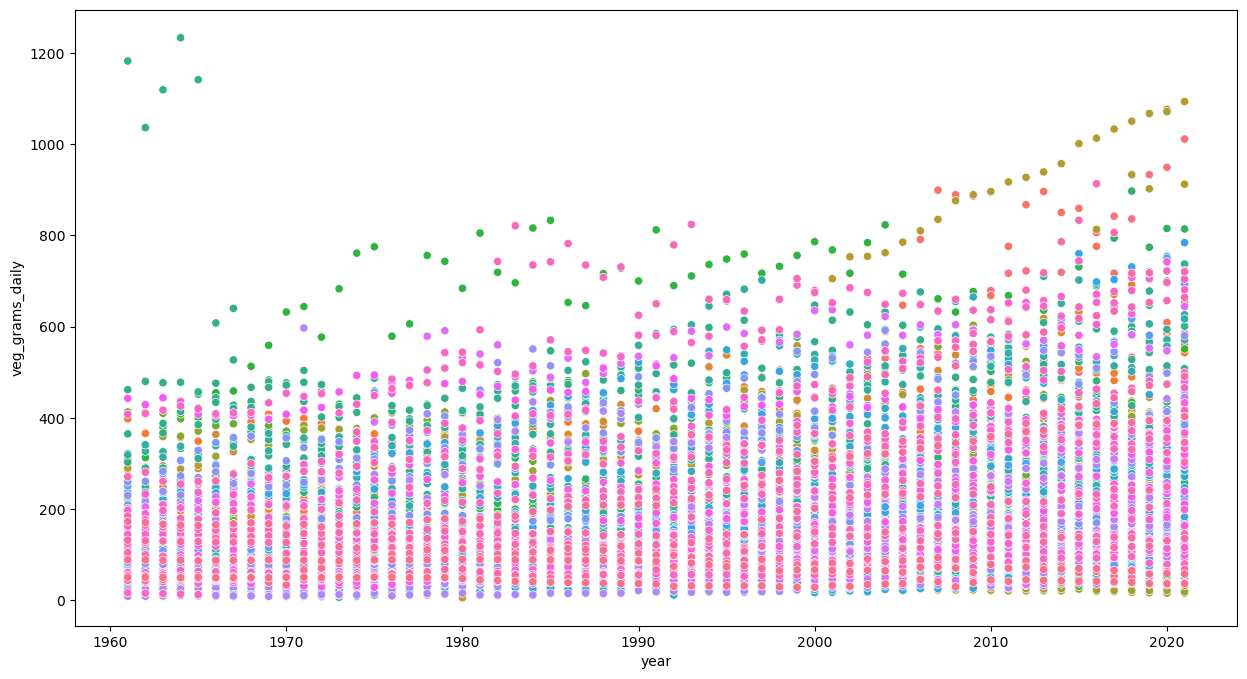

In [53]:
plt.figure(figsize=(15,8))

sns.scatterplot(final_frame,x='year',
                y='veg_grams_daily',
                hue= 'entity',
               legend = False)


<Axes: xlabel='year', ylabel='fruit_grams_daily'>

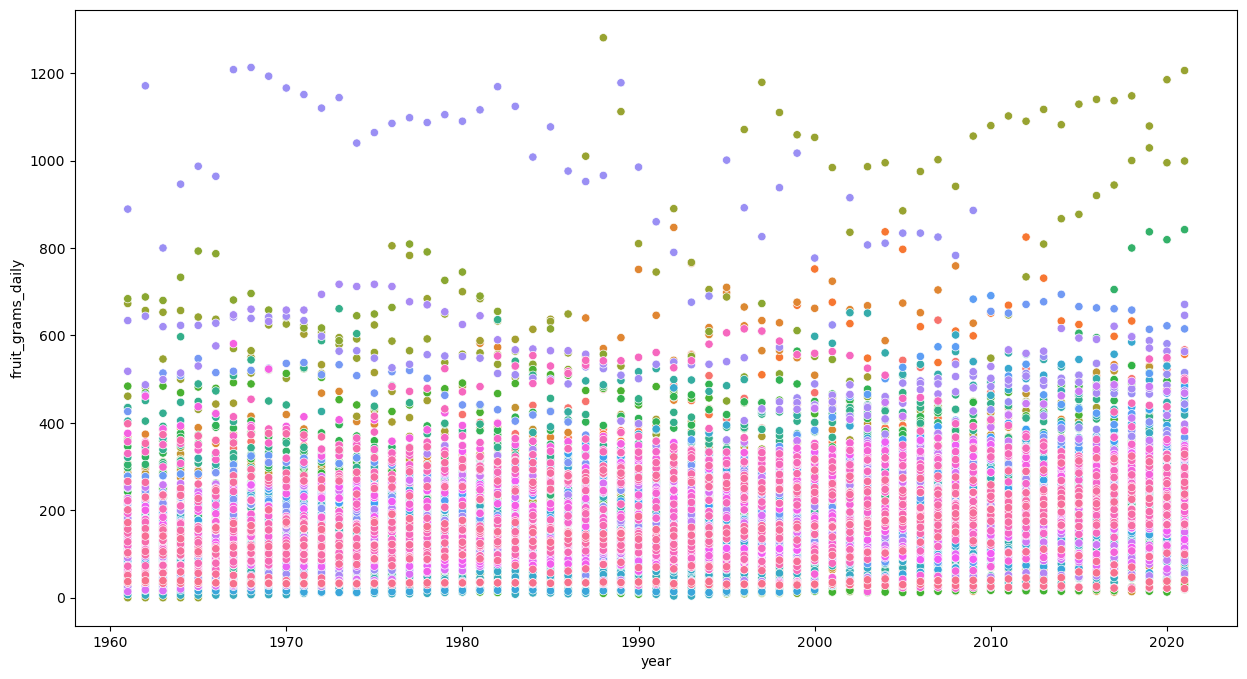

In [55]:
plt.figure(figsize=(15,8)) 

sns.scatterplot(all_foods,x='year',
                y='fruit_grams_daily',
                hue='entity',
                legend= False)

<Axes: xlabel='year', ylabel='life_expectancy'>

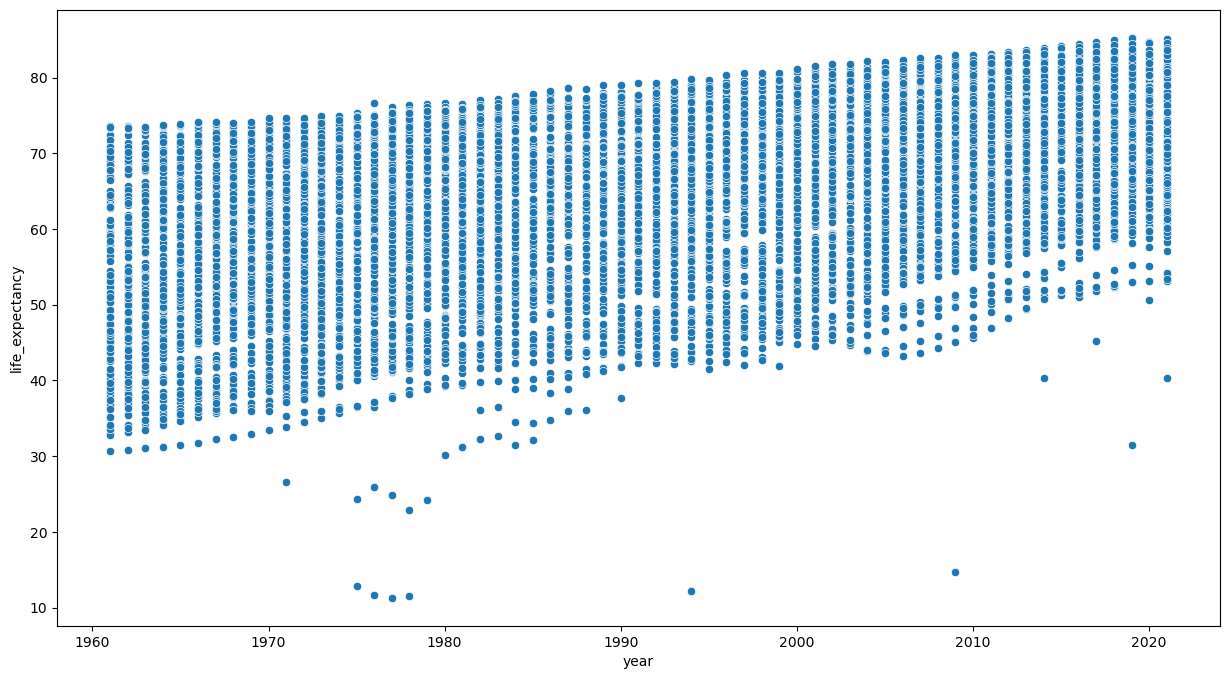

In [57]:
plt.figure(figsize=(15,8)) 

sns.scatterplot(capstone,
               x='year',
               y='life_expectancy')



#### world pork consumption visualised

<Axes: xlabel='year', ylabel='pork'>

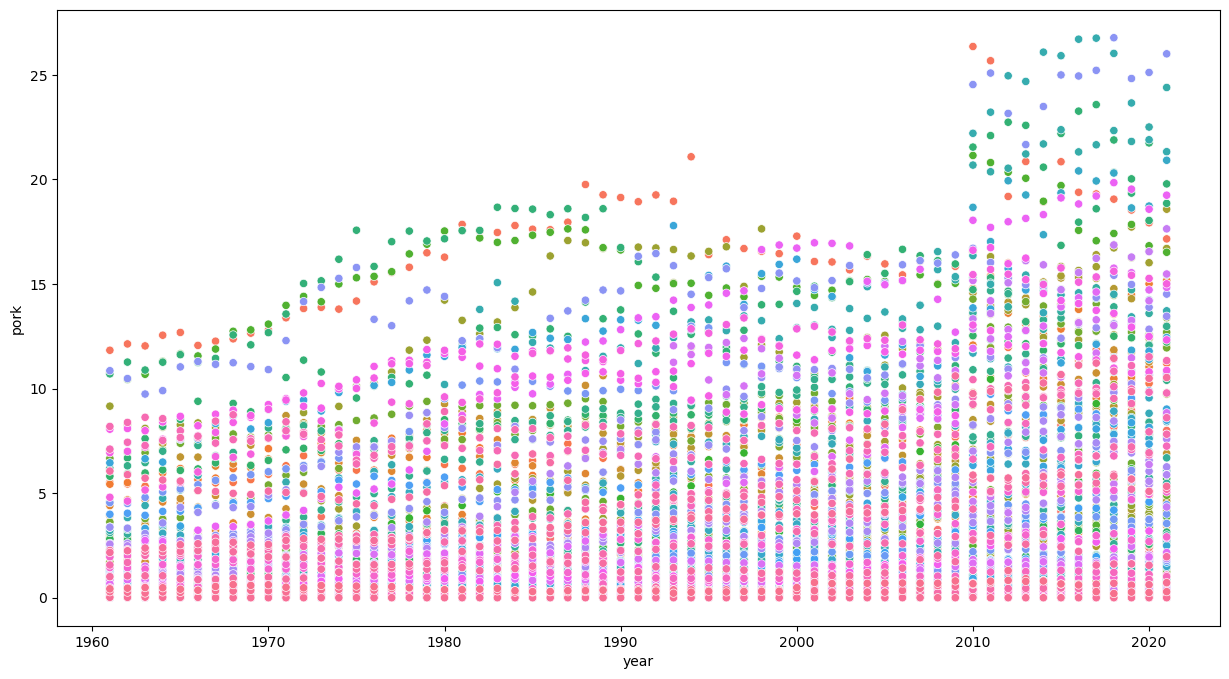

In [112]:
plt.figure(figsize=(15,8))

sns.scatterplot(final_frame,x='year',
                y='pork',
                hue = 'entity',
                legend = False)

In [114]:
mask2 = (us_food_choices['year'] >= 2010) & (us_food_choices['year'] <= 2020)  
us_food_choices.loc[mask2]

NameError: name 'us_food_choices' is not defined

<Axes: xlabel='year', ylabel='fruit_kilo_yearly'>

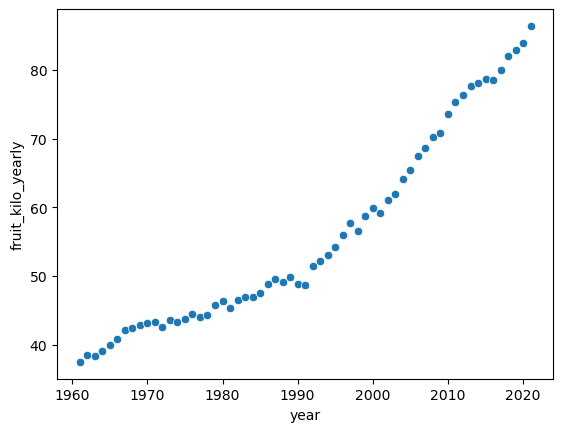

## question time

# what countries the most protein rich diets? 

In [588]:
final_frame.columns

Index(['entity', 'code', 'year', 'fish', 'poultry', 'pork', 'beef',
       'sheep/goat', 'other', 'eggs', 'milk', 'fruit_grams_daily',
       'veg_grams_daily', 'life_expectancy', 'gdp_per_capita', 'population',
       'all_cause_mortality_per_100,000',
       'daily calorie supply per person that comes from animal protein',
       'daily calorie supply per person that comes from vegetal protein',
       'daily calorie supply per person from fat',
       'daily calorie supply per person from carbohydrates',
       'total_daily_protein'],
      dtype='object')

<Axes: xlabel='entity', ylabel='total_daily_protein'>

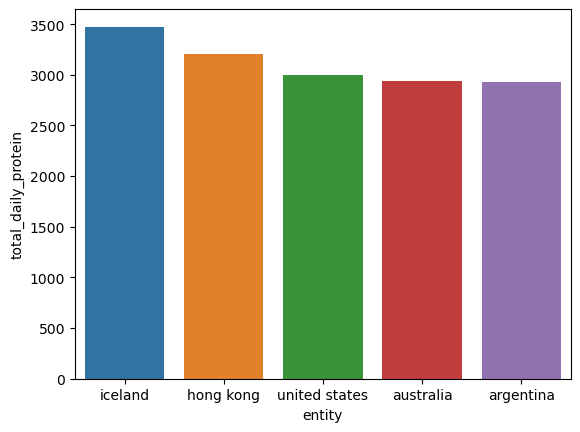

In [619]:
top_five_total_protein = final_frame.groupby(['entity']) \
                                   .agg({'total_daily_protein': 'sum'}) \
                                   .sort_values(by='total_daily_protein', ascending=False) \
                                   .head(5) \
                                   .reset_index()                      

   
sns.barplot(top_five_total_protein,x = 'entity',y='total_daily_protein',hue='entity')

## What countries eat the least amount of protein a day? 

In [626]:
non_zero = final_frame.loc[final_frame['total_daily_protein'] > 0.00]


bottom_five = non_zero.groupby('entity').agg({'total_daily_protein':'sum'}).sort_values(by='total_daily_protein',ascending = True).head(5).reset_index()


bottom_five                                    


,entity,total_daily_protein
0,burundi,23.979995
1,bhutan,30.289748
2,south sudan,32.759990
3,democratic republic of congo,36.849998
4,ethiopia,93.956330


## top 5 countries who dervice protein from animal sources.

In [628]:
final_frame.groupby(['entity']).agg({
    'daily calorie supply per person that comes from animal protein':'sum'}).sort_values(by='daily calorie supply per person that comes from animal protein',ascending = False).head(5).reset_index()

,entity,daily calorie supply per person that comes from animal protein
0,iceland,22679.55123
1,france,17880.69200
2,australia,17876.34393
3,united states,17793.67727
4,ireland,16984.12045


## top 5 countries who derive protein from mainly veg 

In [630]:
final_frame.groupby(['entity']).agg({
    'daily calorie supply per person that comes from vegetal protein':'sum'}).sort_values(by='daily calorie supply per person that comes from vegetal protein',ascending = False).head(6).reset_index()

,entity,daily calorie supply per person that comes from vegetal protein
0,turkey,17737.37314
1,egypt,15802.58734
2,morocco,15567.96060
3,tunisia,14839.75712
4,afghanistan,13423.14835
5,romania,13417.57011


# what countries derive more protein from veg source vs animal source? 

In [640]:
veg_heavy = final_frame.loc[final_frame['daily calorie supply per person that comes from vegetal protein'] > final_frame[ 'daily calorie supply per person that comes from animal protein']]
veg_heavy.entity.unique()

array(['afghanistan', 'africa', 'albania', 'algeria', 'angola', 'armenia',
       'asia', 'azerbaijan', 'bangladesh', 'barbados', 'belize', 'benin',
       'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana',
       'brazil', 'brunei', 'bulgaria', 'burkina faso', 'burundi',
       'cambodia', 'cameroon', 'cape verde', 'central african republic',
       'chad', 'chile', 'china', 'colombia', 'comoros', 'congo',
       'costa rica', "cote d'ivoire", 'croatia', 'cuba', 'cyprus',
       'czechoslovakia', 'democratic republic of congo', 'djibouti',
       'dominica', 'dominican republic', 'east timor', 'ecuador', 'egypt',
       'el salvador', 'eswatini', 'ethiopia', 'europe', 'fiji',
       'french polynesia', 'gabon', 'gambia', 'georgia', 'ghana',
       'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau',
       'guyana', 'haiti', 'honduras', 'hong kong', 'hungary', 'india',
       'indonesia', 'iran', 'iraq', 'israel', 'italy', 'jamaica', 'japan',
       'jordan', 'kazakhst

In [646]:
veg_heavy = final_frame.loc[final_frame['daily calorie supply per person that comes from vegetal protein'] > final_frame[ 'daily calorie supply per person that comes from animal protein']].sum()


TypeError: can only concatenate str (not "int") to str

In [213]:
top_five_life_ex = final_frame.groupby(['entity']).agg({
    'life_expectancy':'max'}).sort_values(by='life_expectancy',ascending = False).head(5).reset_index()

,entity,life_expectancy
0,hong kong,85.2632
1,japan,84.6703
2,macao,84.6100
3,south korea,83.8517
4,switzerland,83.7804


In [ ]:
final_frame.entity.unique()


final_frames = final_frame[~final_frame['entity'].str.contains(r'\(.*\)')]
           

In [381]:
final_frame.entity.unique()

array(['afghanistan', 'africa', 'albania', 'algeria', 'angola',
       'antigua and barbuda', 'argentina', 'armenia', 'asia', 'australia',
       'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh',
       'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bermuda',
       'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana',
       'brazil', 'brunei', 'bulgaria', 'burkina faso', 'burundi',
       'cambodia', 'cameroon', 'canada', 'cape verde',
       'central african republic', 'chad', 'chile', 'china', 'colombia',
       'comoros', 'congo', 'costa rica', "cote d'ivoire", 'croatia',
       'cuba', 'cyprus', 'czechia', 'czechoslovakia',
       'democratic republic of congo', 'denmark', 'djibouti', 'dominica',
       'dominican republic', 'east timor', 'ecuador', 'egypt',
       'el salvador', 'estonia', 'eswatini', 'ethiopia', 'europe', 'fiji',
       'finland', 'france', 'french guiana', 'french polynesia', 'gabon',
       'gambia', 'georgia', 'germany', 'ghana', 'gree

In [642]:
final_frame['daily calorie supply per person that comes from vegetal protein'].sum() 

1742406.9839350001